In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = Path("data/Mouse_metadata.csv")
study_results_path = Path("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
merged_df.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
num_mice = merged_df['Mouse ID'].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# First, find the duplicate mice
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Then, get all data for each duplicate mouse
for mouse in duplicate_mice:
    duplicate_data = merged_df.loc[merged_df['Mouse ID'] == mouse]
    print(f'Data for Mouse ID {mouse}:')
    display(duplicate_data)

Data for Mouse ID g989:


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
# Drop the rows with Mouse ID "g989"
clean_df = merged_df.drop(merged_df[merged_df["Mouse ID"] == "g989"].index)

# Display the clean DataFrame
clean_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
# Count the number of unique mice in the clean DataFrame
num_unique_mice = clean_df["Mouse ID"].nunique()

# Print the result
num_unique_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the data by drug regimen and calculate the summary statistics
summary_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."
})

# Print the summary statistics table
summary_stats




Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Use the agg method with a dictionary of column names and functions to generate the summary statistics
summary_stats = clean_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

# Flatten the hierarchical column index
summary_stats.columns = summary_stats.columns.map("_".join)

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    "Tumor Volume (mm3)_mean": "Mean Tumor Volume",
    "Tumor Volume (mm3)_median": "Median Tumor Volume",
    "Tumor Volume (mm3)_var": "Tumor Volume Variance",
    "Tumor Volume (mm3)_std": "Tumor Volume Std. Dev.",
    "Tumor Volume (mm3)_sem": "Tumor Volume Std. Err."
})

# Print the summary statistics table
summary_stats


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

## Bar and Pie Charts

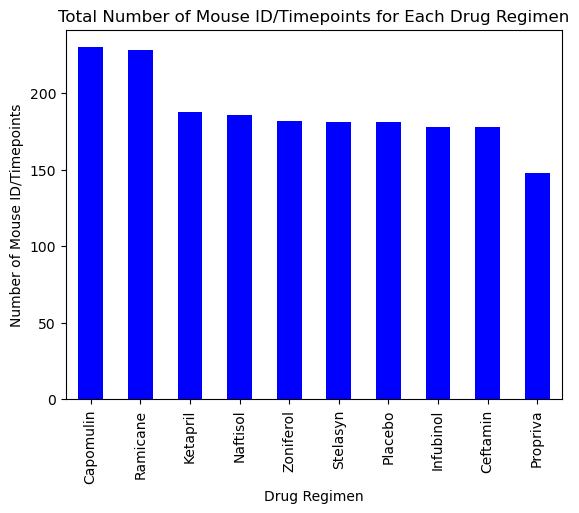

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create a dataframe that counts the number of Mouse ID/Timepoints for each Drug Regimen
drug_counts = clean_df["Drug Regimen"].value_counts()

# Create a bar plot using the Pandas plot() function
drug_counts.plot(kind="bar", color="blue")

# Set the title and labels
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")

# Display the plot
plt.show()

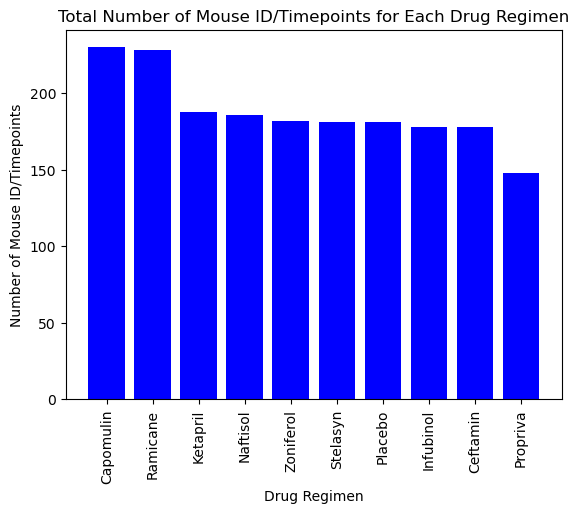

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create a dataframe that counts the number of Mouse ID/Timepoints for each Drug Regimen
drug_counts = clean_df["Drug Regimen"].value_counts()

# Create a bar plot using the Pyplot bar() function
plt.bar(drug_counts.index, drug_counts.values, color="blue")

# Set the title and labels
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


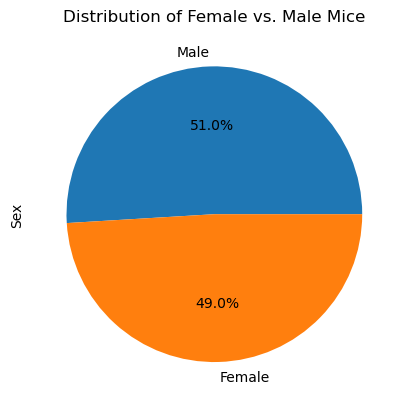

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Create a dataframe that counts the number of female and male mice
gender_counts = clean_df["Sex"].value_counts()

# Create a pie plot using the Pandas plot() function
gender_counts.plot(kind="pie", y="Sex", autopct="%1.1f%%")

# Set the title
plt.title("Distribution of Female vs. Male Mice")

# Display the plot
plt.show()



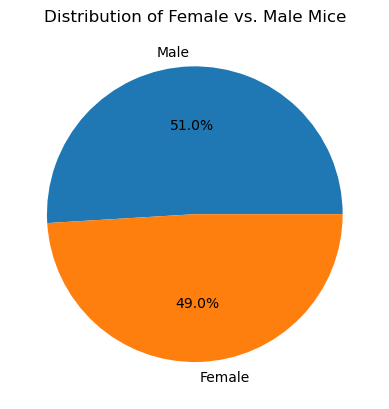

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create a dataframe that counts the number of female and male mice
gender_counts = clean_df["Sex"].value_counts()

# Create a pie plot using the pyplot pie() function
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")

# Set the title
plt.title("Distribution of Female vs. Male Mice")

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Calculate the last (greatest) timepoint for each mouse
max_timepoints = merged_df.groupby('Mouse ID')['Timepoint'].max()

# Create a DataFrame that contains the final timepoint for each mouse
final_timepoints_df = pd.DataFrame(max_timepoints)

# Merge the final timepoints DataFrame with the original DataFrame to get the tumor volume at the last timepoint for each mouse
merged_final_df = pd.merge(final_timepoints_df, merged_df, on=['Mouse ID', 'Timepoint'], how='left')

# Specify the treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the merged DataFrame to include only the specified treatment regimens
final_tumor_volume_df = merged_final_df[merged_final_df['Drug Regimen'].isin(treatment_regimens)]

# final_tumor_volume_df
final_tumor_volume_df = final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
# print(final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])
final_tumor_volume_df


Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Loop through each treatment
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == treatment].groupby("Mouse ID").agg({"Timepoint": "max", "Tumor Volume (mm3)": "last"})
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = final_tumor_vol["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol["Tumor Volume (mm3)"] < lower_bound) | (final_tumor_vol["Tumor Volume (mm3)"] > upper_bound)]
    
    # Append the tumor volume data to the list
    tumor_vols.append(final_tumor_vol["Tumor Volume (mm3)"])
    
    # Print summary statistics and outliers
    print(f"{treatment} Regimen")
    print(f"Number of Mice: {len(final_tumor_vol)}")
    print(f"Median Tumor Volume: {quartiles[0.5]}")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    # Check if there are any outliers
    if len(outliers) > 0:
        print(f"{treatment}'s potential outliers: {outliers['Tumor Volume (mm3)']}")
    else:
        print(f"No potential outliers found")
        
    print()


Capomulin Regimen
Number of Mice: 25
Median Tumor Volume: 38.1251644
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
No potential outliers found

Ramicane Regimen
Number of Mice: 25
Median Tumor Volume: 36.56165229
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
No potential outliers found

Infubinol Regimen
Number of Mice: 25
Median Tumor Volume: 60.16518046
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Infubinol's potential outliers: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin Regimen
Number of Mice: 25
Median Tumor Volume: 59.85195552
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
No potent

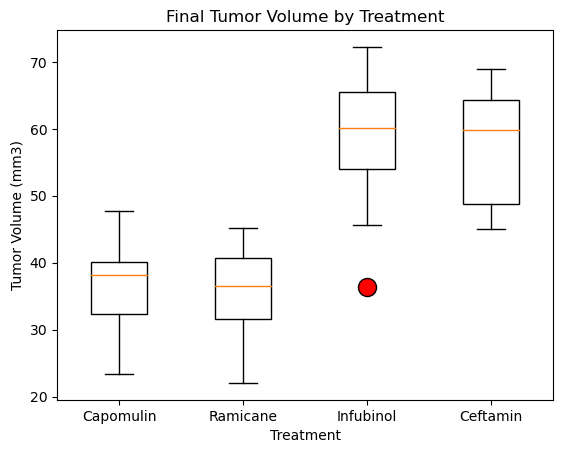

In [15]:
# Create a list of the four treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each treatment
tumor_vol_data = []

# Iterate through each treatment and extract the tumor volume data
for treatment in treatments:
    # Create a subset dataframe for each treatment
    treatment_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    # Get the tumor volume data for the last timepoint for each mouse
    tumor_vol = treatment_df.groupby('Mouse ID').agg({'Timepoint': 'max', 'Tumor Volume (mm3)': 'last'})['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    tumor_vol_data.append(list(tumor_vol))

# Create a box plot of the tumor volume data for each treatment
fig, ax = plt.subplots()

# Customize the box plot colors (I didn't color it, but it's there as option.)
box_colors = ['white', 'white', 'white', 'white']

# Create the box plot with customized colors
bp = ax.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, boxprops=dict(facecolor='white'))

# Set the color of the outlier markers for 'Infubinol' to red
outlier_marker = bp['fliers'][2]  # 'Infubinol' is at index 2
outlier_marker.set(markerfacecolor='red', markersize=13)

# Set the title and axis labels
ax.set_title('Final Tumor Volume by Treatment')
ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

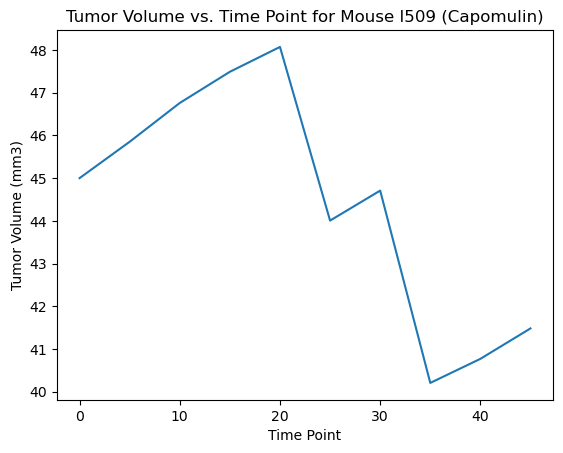

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for mice treated with Capomulin
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Choose a single mouse (e.g. mouse ID s185) and extract its tumor volume data
mouse_id = "l509"
mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == mouse_id, ["Timepoint", "Tumor Volume (mm3)"]]

# Create a line plot of tumor volume vs. time point for the chosen mouse
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])

# Set the plot title and axis labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()


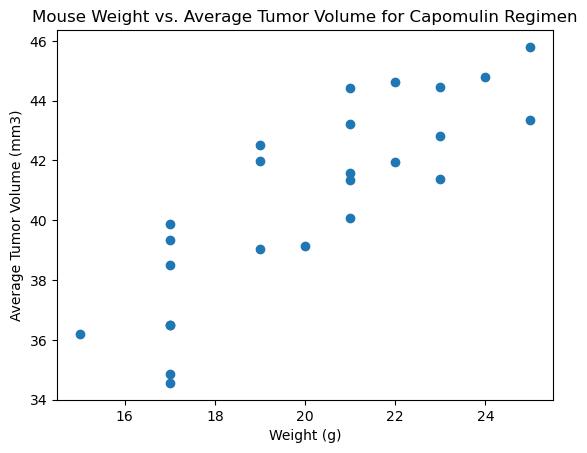

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for mice treated with Capomulin
capomulin_data = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID and calculate the mean tumor volume and weight for each mouse
capomulin_grouped = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

# Create a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])

# Set the plot title and axis labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


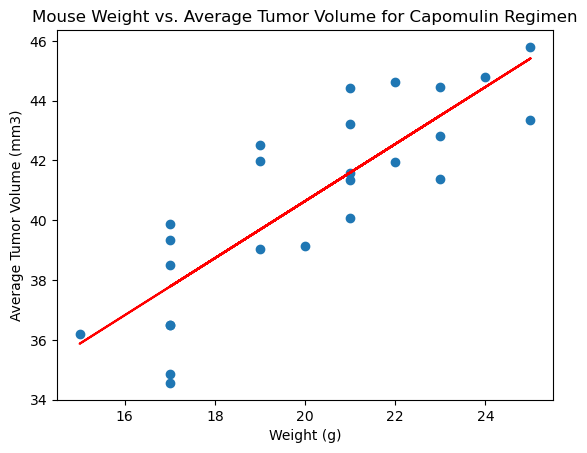

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Import the necessary libraries
from scipy.stats import linregress

# Get the weight and tumor volume data
x = capomulin_grouped["Weight (g)"]
y = capomulin_grouped["Tumor Volume (mm3)"]

# Calculate the correlation coefficient
r, p_value = stats.pearsonr(x, y)
print(f"The correlation between mouse weight and the average tumor volume is  {r:.2f}")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the regression line data
regress_values = x * slope + intercept

# Create the scatter plot of the data and the regression line
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")

# Set the plot title and axis labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()
